Buatlah 2 dataframe dari dictionary, masing- masing dictionary minimal memiliki 5 values. Dictionary pertama berisi profile customer yang memiliki variable customer id, nama customer, no seri motor dan alamat customer. Sedangkan dictionary kedua berisi informasi mengenai motor tersebut seperti no seri motor, jenis motor, harga motor dan jenis pembayaran motor. Gabungkan ( Join ) kedua dataframe tersebut dengan key join no seri motor dan beri nama data tersebut menjadi transaksi penjualan. Lalu urutkan data transaksi penjualan berdasarkan harga motor dari harga termahal ke terendah lalu save data dengan format excel atau csv.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

dictionary = {'customerID' : ["123ADA","254BBD","965CVC","964DDE","978DDC"],
             'nama_customer' : ["Andi","Dinda","Stephanie","Monica","Suparno"],
             'no_seri_motor' : ["DHDD8564","DHDH9861","DTET8403","DJAJ7952","DJAJ9856"],
              'alamat_customer' : ["Karanganyar","Kemabng","Lebak","Lembang","Jogja"]}

df=pd.DataFrame(dictionary)
df

dictionary1 = {'no_seri_motor' : ["DHDD8564","DHDH9861","DTET8403","DJAJ7952","DJAJ9856"],
              'jenis_motor' : ["Vario","Supra","Beat","NMax","Mio"],
              'harga_motor' : [58000000, 15000000, 2600000, 89900000, 96500000],
              'jenis_pembayaran_motor' : ["Transfer","Mandiri Finance","WOM Finance","BAF","ACC"]}

df1=pd.DataFrame(dictionary1)
df1

transaksi_penjualan = df.set_index('no_seri_motor').join(df1.set_index('no_seri_motor'), how='outer')
transaksi_penjualan

#mengurutkan data frame
transaksi_penjualan.sort_values(by='harga_motor',ascending=False)

#export tabel tersebut ke file csv
transaksi_penjualan.to_csv('Transaksi Penjualan.csv', index = False)

Dengan menggunakan data Telcom Churn Prediction, lakukan overview data untuk menentukan
apakah data yang kita miliki sudah bagus atau belum. Lakukan selengkap mungkin!
* Cek data types dan ubah data types variable yang tidak sesuai (terutama variable total
charges)
* Cek dan handling data duplicate, outlier ( dengan menggunakan metode apapun silahkan
explore ), missing values
* Hitung descriptive statistics pada data tersebut

In [2]:
#import data file csv
import pandas as pd
dd = pd.read_csv('https://github.com/kevinnkevinn/portfoliodatascience/raw/main/Data%20Source/Telco-Customer-Churn.csv', sep=',')
dd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
#Cek data types
dd.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
#cari tau info mengenai tabel Telco-Customer-Churn
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#cek ukuran tabel
dd.shape

(7043, 21)

In [6]:
#mengurutkan tabel berdasarkan Customer ID dari kecil ke besar
dd.sort_values(by='customerID',ascending=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2307,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,No
3488,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,No
3845,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
5931,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,Yes
5569,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3607,9987-LUTYD,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,No
2875,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,Yes
1260,9992-UJOEL,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,No
1996,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,No


In [7]:
#cari tau variasi Metode Pembayaran
dd['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [8]:
#cari tau jumlah variasi Metode Pembayaran
dd['PaymentMethod'].nunique()

4

In [9]:
#menghitung jumlah values di variable tertentu
dd['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [10]:
#check missing values
dd.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#handling missing value using median
dd['TotalCharges']=dd['TotalCharges'].fillna(dd['TotalCharges'].median())
dd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:
#check lagi missing values
dd.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#cek  apakah datanya ada yang terduplikasi atau tidak
dd[dd['customerID'].duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


C:\Users\Kevin Kiding\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


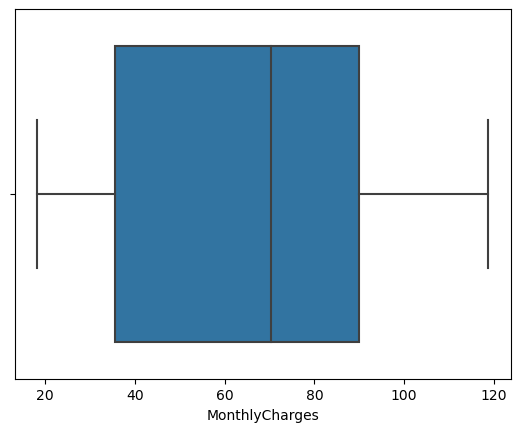

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#handling and check outliers
sns.boxplot(dd['MonthlyCharges'])
plt.show()

In [15]:
#Define Q1 and Q3

Q1 = dd['MonthlyCharges'].quantile(0.25)
Q3 = dd['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Upper_Whisker)
print(Lower_Whisker)

171.375
-46.02499999999999


In [16]:
#mendeskirpsikan data tersebut
dd.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
dd['MonthlyCharges'].min()

18.25

In [18]:
dd.shape

(7043, 21)

In [19]:
dd= dd[(dd['MonthlyCharges']>Lower_Whisker) & (dd['MonthlyCharges']<Upper_Whisker)]
dd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Tampilkan data dengan variable customerid, tenure, monthly charge, total charge , churn dan index ke 0,10,100

In [20]:
dd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#Tampilkan data dengan variable customerid, tenure, monthly charge, total charge, churn
dd.loc[[0,10,100],['customerID','tenure','MonthlyCharges','TotalCharges','Churn']]

,customerID,tenure,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,29.85,29.85,No
10,9763-GRSKD,13,49.95,587.45,No
100,6380-ARCEH,1,20.20,20.20,No


Hitung percentage orang yang churn dan tidak churn

In [22]:
#mencari persentase yang churn 
yes = dd['Churn'].value_counts("Yes") * 100
yes

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Untuk menganalisis behaviour orang yang churn diperlukan untuk analisis lebih dalam hubungan antara variable dengan target ( Churn/ Tidak Churn ).

• Lihat hubungan antara variable kontrak dan variable churn. Jenis kontrak apa yang memiliki kemungkinan churn lebih tinggi dan jenis kontrak apa yang memiliki tingkat churn lebih rendah ( Bisa menggunaka groupby/ Pivot)

In [23]:
#menghitung jumlah Contract berdasarkan Churn
dd.groupby(['Contract'])[['Churn']].count()


,Churn
Contract,
Month-to-month,3875
One year,1473
Two year,1695


In [24]:
pd.pivot_table(dd,index=['Churn','Contract'])

MonthlyCharges  SeniorCitizen  TotalCharges     tenure
Churn Contract                                                              
No    Month-to-month       61.462635       0.164865   1521.927590  21.033333
      One year             62.508148       0.123183   2902.417578  41.674063
      Two year             60.012477       0.084396   3665.133576  56.602914
Yes   Month-to-month       73.019396       0.266465   1164.460574  14.016918
      One year             85.050904       0.174699   4066.212048  44.963855
      Two year             86.777083       0.125000   5432.363542  61.270833

Dapat disimpulkan bahwa jenis kontrak "Month-to-Month" memiliki kemungkinan Churn lebih tinggi (yakni 3875) dan untuk kontrak "One Year" memiliki Churn yang lebih rendah (yakni 1473). Untuk kontrak "Two Year" memiliki Churn 




Membuat variable baru yang bernama numberoffacility, variable ini untuk menghitung total fasilitas yang dugunakan oleh customer. Fasilitas dihitung dari variable OnlineSecurity, DeviceProtection, StreamingMovies, 'TechSupport', 'StreamingTV' dan 'OnlineBackup'. Hint pengerjaan :

* Ubah isi dari setiap variable jika ‘Yes’= 1 dan ‘No’= 0
* Buat variable baru dengan nama numberoffacility untuk menjumlahkan seluruh variable tersebut

In [25]:
#menampilkan variable OnlineSecurity, DeviceProtection, StreamingMovies, 'TechSupport', 'StreamingTV' dan 'OnlineBackup'
dd[['OnlineSecurity','DeviceProtection','StreamingMovies','TechSupport','StreamingTV','OnlineBackup']]

,OnlineSecurity,DeviceProtection,StreamingMovies,TechSupport,StreamingTV,OnlineBackup
0,No,No,No,No,No,Yes
1,Yes,Yes,No,No,No,No
2,Yes,No,No,No,No,Yes
3,Yes,Yes,No,Yes,No,No
4,No,No,No,No,No,No
...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,Yes,No
7039,No,Yes,Yes,No,Yes,Yes
7040,Yes,No,No,No,No,No
7041,No,No,No,No,No,No


In [26]:
#Ubah isi dari setiap variable jika ‘Yes’= 1 dan ‘No’= 0
dd = dd.replace({'OnlineSecurity': {'Yes': 1, 
                                'No': 0}})
dd
dd = dd.replace({'DeviceProtection': {'Yes': 1, 
                                'No': 0}})
dd
dd = dd.replace({'StreamingMovies': {'Yes': 1, 
                                'No': 0}})
dd
dd = dd.replace({'TechSupport': {'Yes': 1, 
                                'No': 0}})
dd
dd = dd.replace({'StreamingTV': {'Yes': 1, 
                                'No': 0}})
dd
dd = dd.replace({'OnlineBackup': {'Yes': 1, 
                                'No': 0}})
dd

# menampilkan kolom OnlineSecurity, DeviceProtection, StreamingMovies, 'TechSupport', 'StreamingTV' dan 'OnlineBackup' saja
dd[['OnlineSecurity','DeviceProtection','StreamingMovies','TechSupport','StreamingTV','OnlineBackup']]

,OnlineSecurity,DeviceProtection,StreamingMovies,TechSupport,StreamingTV,OnlineBackup
0,0,0,0,0,0,1
1,1,1,0,0,0,0
2,1,0,0,0,0,1
3,1,1,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,0,1,1
7040,1,0,0,0,0,0
7041,0,0,0,0,0,0


In [28]:
#menampilkan variabel numberoffacility
numberoffacility = dd["OnlineSecurity"] + dd["DeviceProtection"] + dd["StreamingMovies"] + dd["TechSupport"] + dd["StreamingTV"] + dd["OnlineBackup"]
numberoffacility

#menampilkan kolom OnlineSecurity, DeviceProtection, StreamingMovies, 'TechSupport', 'StreamingTV', 'OnlineBackup', dan 'numberoffacility
dd[['OnlineSecurity','DeviceProtection','StreamingMovies','TechSupport','StreamingTV','OnlineBackup']]

,OnlineSecurity,DeviceProtection,StreamingMovies,TechSupport,StreamingTV,OnlineBackup
0,0,0,0,0,0,1
1,1,1,0,0,0,0
2,1,0,0,0,0,1
3,1,1,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,0,1,1
7040,1,0,0,0,0,0
7041,0,0,0,0,0,0


Diasumsikan customer yang memiliki churn yang tinggi Ketika customer memiliki nilai tenure yang pendek kurang dari 30, Monthly charge diatas 60 dan kontraknya month to month.

* Carilah customer dengan kondisi berikut! Berdasarkan data hasil filter tersebut carilah rata- rata Monthly charge-nya! • Carilah customer yang tidak memiliki kodisi di atas

In [29]:
#Carilah customer dengan kondisi berikut!
dd[(dd["tenure"]<30) & 
     (dd["MonthlyCharges"]>60) &
     (dd["Contract"] == "Month-to-month")]
dd


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [30]:
#Berdasarkan data hasil filter tersebut carilah rata- rata Monthly charge-nya!
rata_rata = dd['MonthlyCharges'].mean()
rata_rata

64.76169246059922

In [31]:
#Carilah customer yang tidak memiliki kodisi di atas
dd[(dd["tenure"]>=30) & 
     (dd["MonthlyCharges"]<=60) &
     (dd["Contract"] != "Month-to-month")]
dd

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
